![front1](jupyter_img/front2.png)

## This Jupyter notebook is available at https://github.com/dkp-quantum/Tutorials

## Further Information

#### * Qiskit: https://qiskit.org

#### * Qiskit GitHub: https://github.com/Qiskit

## Exercise 2:  
## Design a quantum circuit that creates a 3-qubit entangled state: $\alpha|000\rangle+\beta|111\rangle$,
## such that $|\alpha|^2 = 0.25$, and $|\beta|^2 = 0.75$. 
## Check the answer with the QASM simulation and by plotting the histogram of the measurement statistics.

### Hint:
$R_y(\theta) = \begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2)\\ \sin(\theta/2) & \cos(\theta/2)\end{bmatrix}$ can be implemented by the qiskit code: `qc.ry(theta,q)`

In [13]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.visualization import *
import numpy as np

In [14]:
# Create a quantum register with 3 qubits
q3 = QuantumRegister(3,'q')
# Create a classical register with 3 qubits
c3 = ClassicalRegister(3,'c')

# Create the quantum circuit with the measurement in one go.
qc_ex2 = QuantumCircuit(q3,c3,name="ex1")

qc_ex2.ry(2*np.pi/3,0)
qc_ex2.cx(0,1)
qc_ex2.cx(1,2)
qc_ex2.barrier()
qc_ex2.measure(q3,c3)
qc_ex2.draw(output='mpl')# Now, add a Toffoli gate
qc_toff = QuantumCircuit(q3,c3,name="ex1")

In [15]:
backend_q = Aer.get_backend('qasm_simulator')

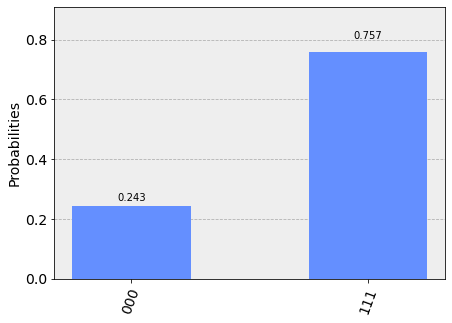

In [16]:
# Execute the circuit on the qasm simulator.
job_ex2 = execute(qc_ex2, backend_q, shots=4096)

# Grab the results from the job.
result_ex2 = job_ex2.result()
plot_histogram(result_ex2.get_counts(qc_ex2))

## 3-qubit gate example: Toffoli gate

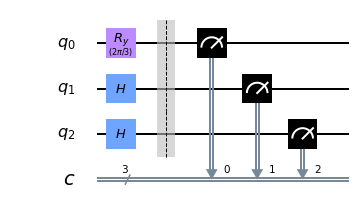

In [17]:
# Create a quantum register with 3 qubits
q3 = QuantumRegister(3,'q')
# Create a classical register with 3 qubits
c3 = ClassicalRegister(3,'c')

# Create the quantum circuit without a Toffoli gate
qc_toff = QuantumCircuit(q3,c3,name="ex1")

qc_toff.ry(2*np.pi/3,0)
qc_toff.h(1)
qc_toff.h(2)
qc_toff.barrier()
qc_toff.measure(q3,c3)
qc_toff.draw(output='mpl')

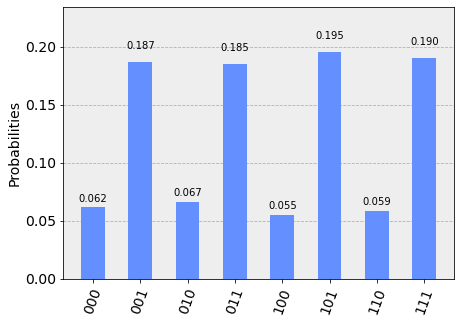

In [18]:
# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is default.
job_toff = execute(qc_toff, backend_q, shots=4096)

# Grab the results from the job.
result_toff = job_toff.result()
plot_histogram(result_toff.get_counts(qc_toff))

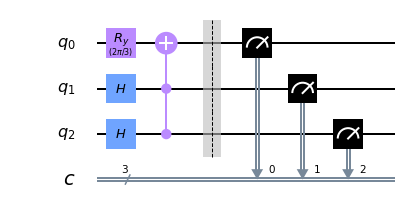

In [19]:
# Now, add a Toffoli gate
qc_toff = QuantumCircuit(q3,c3,name="ex1")

qc_toff.ry(2*np.pi/3,0)
qc_toff.h(1)
qc_toff.h(2)
qc_toff.ccx(1,2,0)
qc_toff.barrier()
qc_toff.measure(q3,c3)
qc_toff.draw(output='mpl')

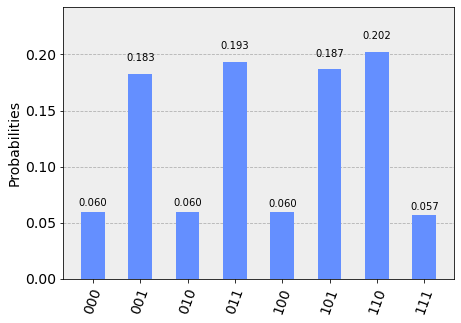

In [20]:
# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is default.
job_toff = execute(qc_toff, backend_q, shots=4096)

# Grab the results from the job.
result_toff = job_toff.result()
plot_histogram(result_toff.get_counts(qc_toff))

## Native single-qubit gates of IBM Q devices

One way to write a general form of a single qubit unitary:
<br>
<br>
$$
U(\theta,\phi,\lambda)=\begin{bmatrix} 
 \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i(\lambda+\phi)}\cos(\theta/2) 
\end{bmatrix}
$$
***
Native single qubit gates:
* `u3`=$U(\theta,\phi,\lambda)$
* `u2`=$U(\pi/2,\phi,\lambda)$
* `u1`=$U(0,0,\lambda)$

Native two qubit gate:
* controlled-NOT

### But why such form? $\rightarrow$ This is related to gate implementations on real devices

### Note that $$
U(\theta,\phi,\lambda)=\begin{bmatrix} 
 \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i(\lambda+\phi)}\cos(\theta/2) 
\end{bmatrix}
$$ 
### can be written as:
### \begin{align}
U(\theta,\phi,\lambda)&=R_z(\phi)R_y(\theta)R_z(\lambda)\\
&=R_z(\phi)R_x(-\pi/2)R_z(\theta)R_x(\pi/2)R_z(\lambda)
\end{align}

### In RF/MW based quantum control, $R_z$ is given for free, and $R_x(\pm\pi/2)$ can be calibrated with high precision.

## Running Quantum Circuits on IBM Q
![ibmq](jupyter_img/ibmq.jpeg)

### Need IBM Token for running an experiment on a IBM cloud quantum computer:  https://quantum-computing.ibm.com

In [233]:
IBMQ.disable_account()
provider = IBMQ.enable_account('IBM_TOKEN')

In [235]:
#provider = IBMQ.get_provider(hub='ibm-q-research')

In [236]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q-research', group='Daniel-Park', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-research', group='Daniel-Park', pro

In [212]:
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor
from qiskit.tools.visualization import plot_gate_map, plot_error_map

In [213]:
# Retrieve IBM Quantum device information
backend_overview()

ibmq_rome                    ibmq_armonk                  ibmq_essex
---------                    -----------                  ----------
Num. Qubits:  5              Num. Qubits:  1              Num. Qubits:  5
Pending Jobs: 6              Pending Jobs: 2              Pending Jobs: 70
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      77.2           Avg. T1:      149.4          Avg. T1:      104.2
Avg. T2:      109.1          Avg. T2:      225.6          Avg. T2:      143.5



ibmq_burlington              ibmq_london                  ibmq_valencia
---------------              -----------                  -------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 7              Pending Jobs: 7              Pending Jobs: 6
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           

In [214]:
# Let's get two quantum devices as an example
backend_qx2 = provider.get_backend('ibmqx2')
backend_vigo = provider.get_backend('ibmq_vigo')

In [215]:
backend_monitor(backend_qx2)

ibmqx2
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 13
    backend_version: 2.1.0
    basis_gates: ['id', 'u1', 'u2', 'u3', 'cx']
    local: False
    simulator: False
    sample_name: sparrow
    memory: True
    credits_required: True
    meas_map: [[0, 1, 2, 3, 4]]
    max_shots: 8192
    n_registers: 1
    coupling_map: [[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]]
    description: 5 qubit device
    backend_name: ibmqx2
    quantum_volume: 8
    conditional: False
    open_pulse: False
    allow_q_object: True
    url: None
    max_experiments: 75
    allow_object_storage: True
    online_date: 2017-01-24T05:00:00+00:00

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.2829 GHz / 73.79798 µs / 27.86901 µs / 0.0 / 0.00133 / 0.00266 / 0.0495
    Q1 / 5.24766 GHz / 61.

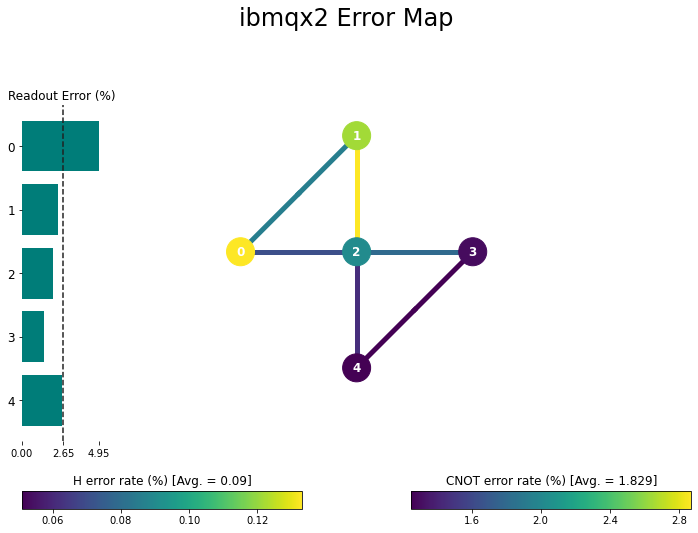

In [216]:
plot_error_map(backend_qx2)

In [217]:
backend_monitor(backend_vigo)

ibmq_vigo
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 7
    backend_version: 1.0.3
    basis_gates: ['id', 'u1', 'u2', 'u3', 'cx']
    local: False
    simulator: False
    sample_name: Giraffe
    memory: True
    credits_required: True
    meas_map: [[0, 1, 2, 3, 4]]
    max_shots: 8192
    n_registers: 1
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]
    description: 5 qubit device Vigo
    backend_name: ibmq_vigo
    quantum_volume: 16
    conditional: False
    open_pulse: False
    allow_q_object: True
    url: None
    max_experiments: 75
    allow_object_storage: True
    online_date: 2019-07-03T04:00:00+00:00

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 4.79649 GHz / 122.04295 µs / 13.28137 µs / 0.0 / 0.00035 / 0.0007 / 0.008
    Q1 / 4.94014 GHz / 64.04633 µs / 78.91768 µ

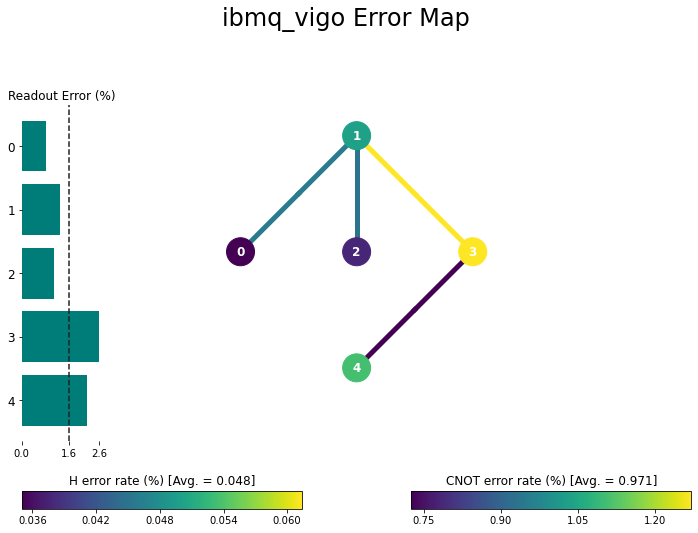

In [218]:
plot_error_map(backend_vigo)

## Let's create a 5-qubit GHZ state, i.e. $ \frac{|00000\rangle + |11111\rangle}{\sqrt{2}}$.

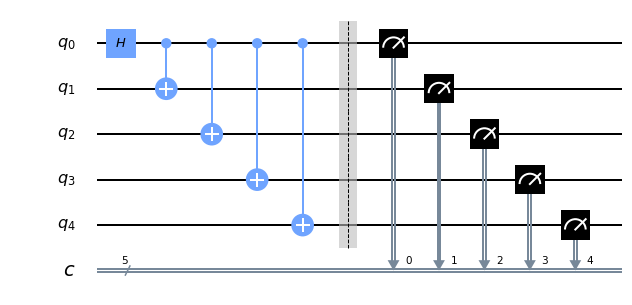

In [219]:
# Create a 5-qubit GHZ state (i.e. (|00000> + |11111>)/sqrt(2))
q5 = QuantumRegister(5,'q')
c5 = ClassicalRegister(5,'c')
ghz5= QuantumCircuit(q5,c5)

ghz5.h(0)
for i in range(1,5):
    ghz5.cx(0,i)

ghz5.barrier()
ghz5.measure(q5,c5)
ghz5.draw(output='mpl')

## Now, let's run it on a real IBMQ device.

In [221]:
# Run the 5-qubit GHZ experiment on a 5-qubit device (try vigo)
job_exp1 = execute(ghz5, backend=backend_vigo, shots=4096)
job_monitor(job_exp1)

Job Status: job has successfully run


In [223]:
# Grab experimental results
result_vigo = job_exp1.result()
counts_vigo = result_vigo.get_counts(ghz5)

In [222]:
# Let's also try the same experiment on the 14-qubit device.
job_exp2 = execute(ghz5, backend=provider.get_backend('ibmq_16_melbourne'), shots=4096)
job_monitor(job_exp2)

Job Status: job has successfully run


In [224]:
# Grab experimental results
result_mel = job_exp2.result()
counts_mel = result_mel.get_counts(ghz5)

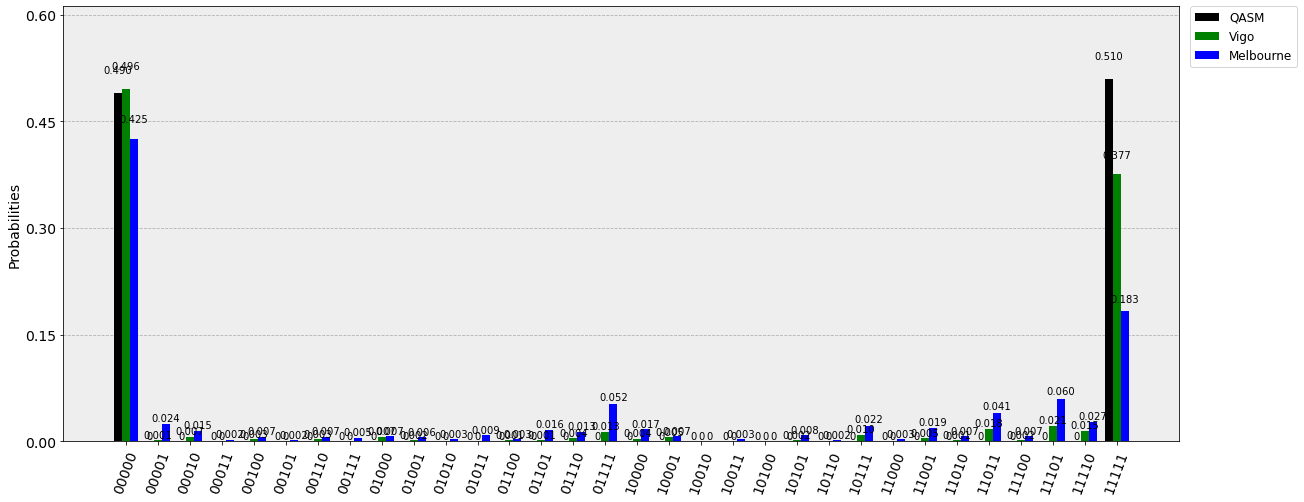

In [225]:
# Now, compare to theory by running it on qasm_simulator
job_qasm = execute(ghz5,backend=backend_q)
result_qasm = job_qasm.result()
counts_qasm = result_qasm.get_counts(ghz5)

# Plot both experimental and ideal results
plot_histogram([counts_qasm,counts_vigo,counts_mel],
               color=['black','green','blue'],
               legend=['QASM','Vigo','Melbourne'],figsize = [20,8])

## Elementary Quantum Protocols

* Superdense coding
* Quantum teleportation

![nocloning](jupyter_img/no_cloning.png)

![sdc1](jupyter_img/superdensecoding1.png)

![sdc2](jupyter_img/superdensecoding2.png)

In [5]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.visualization import *
import numpy as np

In [6]:
# Define a function that takes a QuantumCircuit (qc)
# a qubit index (index) and a message string (msg)
def encoding(qc, index, msg):
    if msg == 0:
        pass    # To send 00 we do nothing
    elif msg == 1:
        qc.x(index) # To send 10 we apply an X-gate
    elif msg == 2:
        qc.z(index) # To send 01 we apply a Z-gate
    elif msg == 3:
        qc.z(index) # To send 11, we apply a Z-gate
        qc.x(index) # followed by an X-gate
    else:
        print("Invalid Message. Sending '00'.")

In [7]:
def decoding(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

In [8]:
def qc_sdc(msg):

    # Create the quantum circuit with 2 qubits
    qc = QuantumCircuit(2)

    # First, an entangled pair is created between Alice and Bob
    # Bob has the first qubit, Alice has the second qubit.
    qc.h(0)
    qc.cx(0,1)

    qc.barrier()

    # Next, Bob encodes his message onto qubit 0.
    encoding(qc, 0, msg)
    qc.barrier()
    # Bob then sends his qubit to Alice.

    # After recieving qubit 0, Alice applies the recovery protocol:
    decoding(qc, 0, 1)

    # Finally, Bob measures his qubits to read Alice's message
    qc.measure_all()
    
    return qc

{'10': 1024}


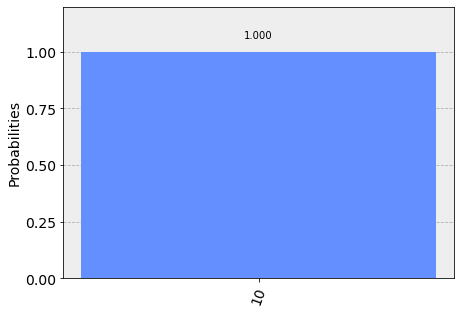

In [9]:
backend_qasm = Aer.get_backend('qasm_simulator')

rand_msg = np.random.randint(4)
qc = qc_sdc(rand_msg)
job_sim = execute(qc, backend_qasm, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

The random message was: 1


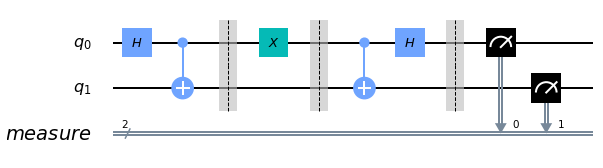

In [10]:
print("The random message was: %s" % rand_msg)
qc.draw(output='mpl')

## Now, let's run it on a real IBMQ device.

In [335]:
provider = IBMQ.enable_account('168a8c034a04e976ce953d744be875833581f9416724197ba86a0ae88614ea5d209ae5fe15b7f582988fb170a2ba64165077ffaaabed9c908551cd5e0f966127')
provider = IBMQ.get_provider(hub='ibm-q-research')

In [336]:
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor
from qiskit.tools.visualization import plot_gate_map, plot_error_map

In [337]:
# Retrieve IBM Quantum device information
backend_overview()

ibmq_rome                    ibmq_armonk                  ibmq_essex
---------                    -----------                  ----------
Num. Qubits:  5              Num. Qubits:  1              Num. Qubits:  5
Pending Jobs: 6              Pending Jobs: 2              Pending Jobs: 70
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      77.2           Avg. T1:      155.4          Avg. T1:      117.6
Avg. T2:      109.1          Avg. T2:      152.1          Avg. T2:      152.9



ibmq_burlington              ibmq_london                  ibmq_valencia
---------------              -----------                  -------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 3              Pending Jobs: 11             Pending Jobs: 2
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           

In [344]:
# Run the superdense coding experiment on a 5-qubit device (try ourense)
job_sdc = execute(qc, backend=provider.get_backend('ibmq_ourense'), shots=4096)
job_monitor(job_sdc)

Job Status: job has successfully run


The random message was: 2


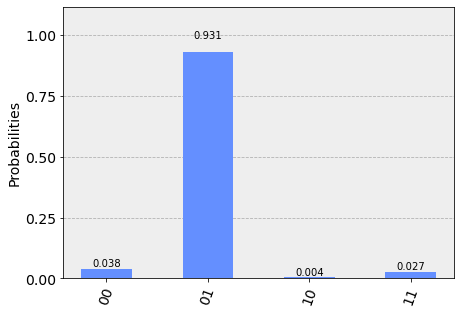

In [345]:
experiment_result = job_sdc.result().get_counts(qc)
print("The random message was: %s" % rand_msg)
plot_histogram(experiment_result)

![qt2](jupyter_img/qteleportation2.png)

In [311]:
def create_bell_pair(qc, a, b):
    # Creates a bell pair in qc using qubits a & b
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

In [312]:
qr = QuantumRegister(3)    # Protocol uses 3 qubits
cr1 = ClassicalRegister(1) # and 2 classical bits
cr2 = ClassicalRegister(1) # in 2 different registers
teleportation = QuantumCircuit(qr, cr1, cr2)

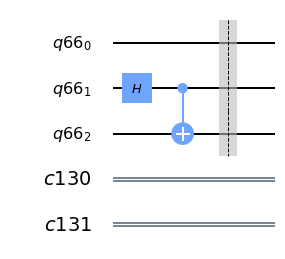

In [313]:
## STEP 1
# Entangle qubits q1 and q2
create_bell_pair(teleportation, 1, 2)
teleportation.barrier()

# And view the circuit so far:
teleportation.draw(output='mpl')

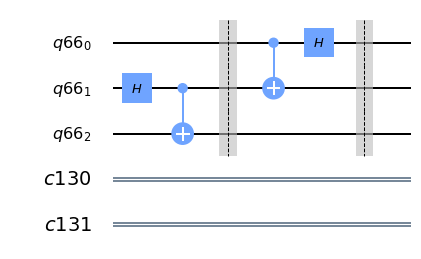

In [314]:
## STEP 2
# Bob performs his gates
teleportation.cx(0,1)
teleportation.h(0)
teleportation.barrier()

# And view the circuit so far:
teleportation.draw(output='mpl')

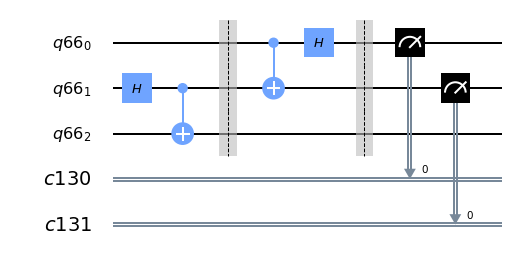

In [315]:
## STEP 3
# Bob measures his part
teleportation.measure(0,0)
teleportation.measure(1,1)

# And view the circuit so far:
teleportation.draw(output='mpl')

In [316]:
# This function takes a QuantumCircuit (qc), qubit index
# and ClassicalRegisters (cr1 & cr2) to decide which gates to apply
def alice_recover(qc, index, cr1, cr2):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.z(index).c_if(cr1, 1) # Apply gates if the registers 
    qc.x(index).c_if(cr2, 1) # are in the state '1'

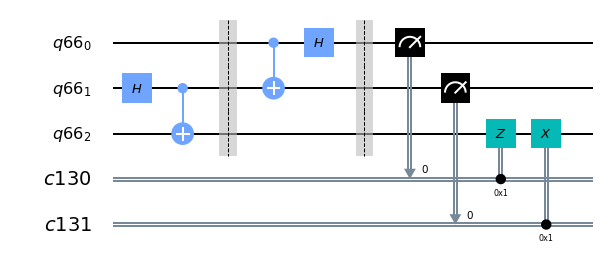

In [317]:
## STEP 4
# Alice perform recovery
alice_recover(teleportation, 2, cr1, cr2)

# And view the circuit so far:
teleportation.draw(output='mpl')

## Let's test Quantum Teleportation with a random state!

In [318]:
def random_init(qc,r1,r2,index):
    
    ## STEP 0
    # Bob prepares a quantum state to teleport
    # by applying a random rotation around x and z
    qc.rx(r1,index)
    qc.rz(r2,index)
    qc.barrier()

In [319]:
def quantum_teleportation(qc):
    
    ## STEP 1
    # Entangle qubits q1 and q2
    create_bell_pair(qc, 1, 2)
    qc.barrier()

    ## STEP 2
    # Bob performs his gates
    qc.cx(0,1)
    qc.h(0)
    qc.barrier()

    ## STEP 3
    # Bob measures his part
    qc.measure(0,0)
    qc.measure(1,1)

    ## STEP 4
    # Alice perform recovery
    alice_recover(qc, 2, cr1, cr2)

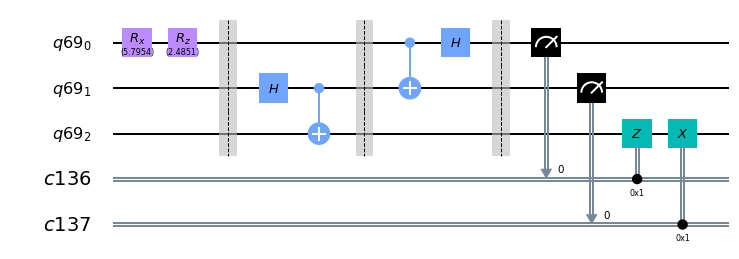

In [330]:
qr = QuantumRegister(3)    # Protocol uses 3 qubits
cr1 = ClassicalRegister(1) # and 2 classical bits
cr2 = ClassicalRegister(1) # in 2 different registers
qc_teleportation = QuantumCircuit(qr, cr1, cr2)
qc_ref = QuantumCircuit(qr)

r1 = np.random.random()*2*np.pi
r2 = np.random.random()*2*np.pi

random_init(qc_ref, r1, r2, 0)

random_init(qc_teleportation, r1, r2, 0)

quantum_teleportation(qc_teleportation)

qc_teleportation.draw(output='mpl')

In [332]:
backend_sv = BasicAer.get_backend('statevector_simulator')

in_vector = execute(qc_ref, backend_sv).result().get_statevector()
out_vector = execute(qc_teleportation, backend_sv).result().get_statevector()

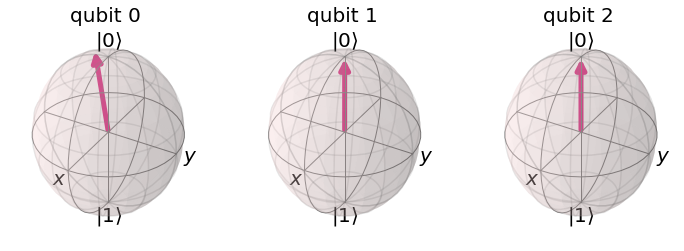

In [333]:
plot_bloch_multivector(in_vector)

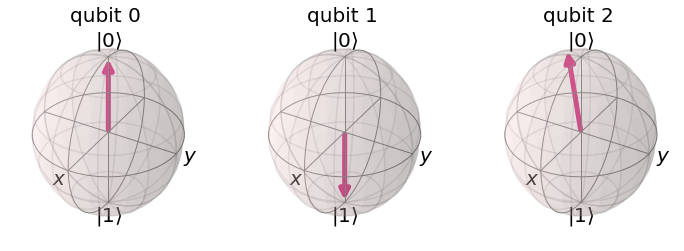

In [334]:
plot_bloch_multivector(out_vector)